___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [265]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [266]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2018,1,1)


In [267]:
BAC = data.DataReader('BAC', 'yahoo', start, end)


In [268]:
C = data.DataReader('C', 'yahoo', start, end)


In [269]:
GS = data.DataReader('GS', 'yahoo', start, end)


In [270]:
JPM = data.DataReader('JPM', 'yahoo', start, end)


In [271]:
MS = data.DataReader('MS', 'yahoo', start, end)


In [272]:
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [273]:
MS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,39.110695
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,39.137527
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,39.244846
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,39.285095
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,39.700924


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [274]:
tickers=['BAC', 'C', 'GS', 'JPM','MS', 'WFC']
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [275]:
bank_stocks=pd.concat([BAC, C, GS, JPM,MS,WFC], keys=tickers, axis=1)

** Set the column name levels (this is filled out for you):**

In [276]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [277]:
bank_stocks.head(1)

Bank Ticker    BAC                                                          \
Stock Info    High        Low       Open      Close      Volume  Adj Close   
Date                                                                         
2006-01-03   47.18  46.150002  46.919998  47.080002  16296700.0  36.332104   

Bank Ticker           C                                   ...             MS  \
Stock Info         High         Low   Open       Close    ...           Open   
Date                                                      ...                  
2006-01-03   493.799988  481.100006  490.0  492.899994    ...      57.169998   

Bank Ticker                                      WFC                      \
Stock Info       Close     Volume  Adj Close    High     Low  Open Close   
Date                                                                       
2006-01-03   58.310001  5377000.0  39.110695  31.975  31.195  31.6  31.9   

Bank Ticker                         
Stock Info       Volume  Adj Close  
Date                                
2006-01-03   11016400.0  21.890329  

[1 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [279]:
    #bank_stocks.iloc[:,bank_stocks.columns.get_level_values(1)=='Close'].max()
bank_stocks.xs(level='Stock Info', axis=1, key='Close').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     261.010010
JPM    107.830002
MS      89.300003
WFC     61.610001
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [280]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [281]:
returns= bank_stocks.xs(axis=1, key='Close', level='Stock Info').pct_change()
returns.columns=['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return', 'WFC Return']
returns.head()
#returns.shape


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [282]:
import seaborn as sns
sns.set_style('whitegrid')

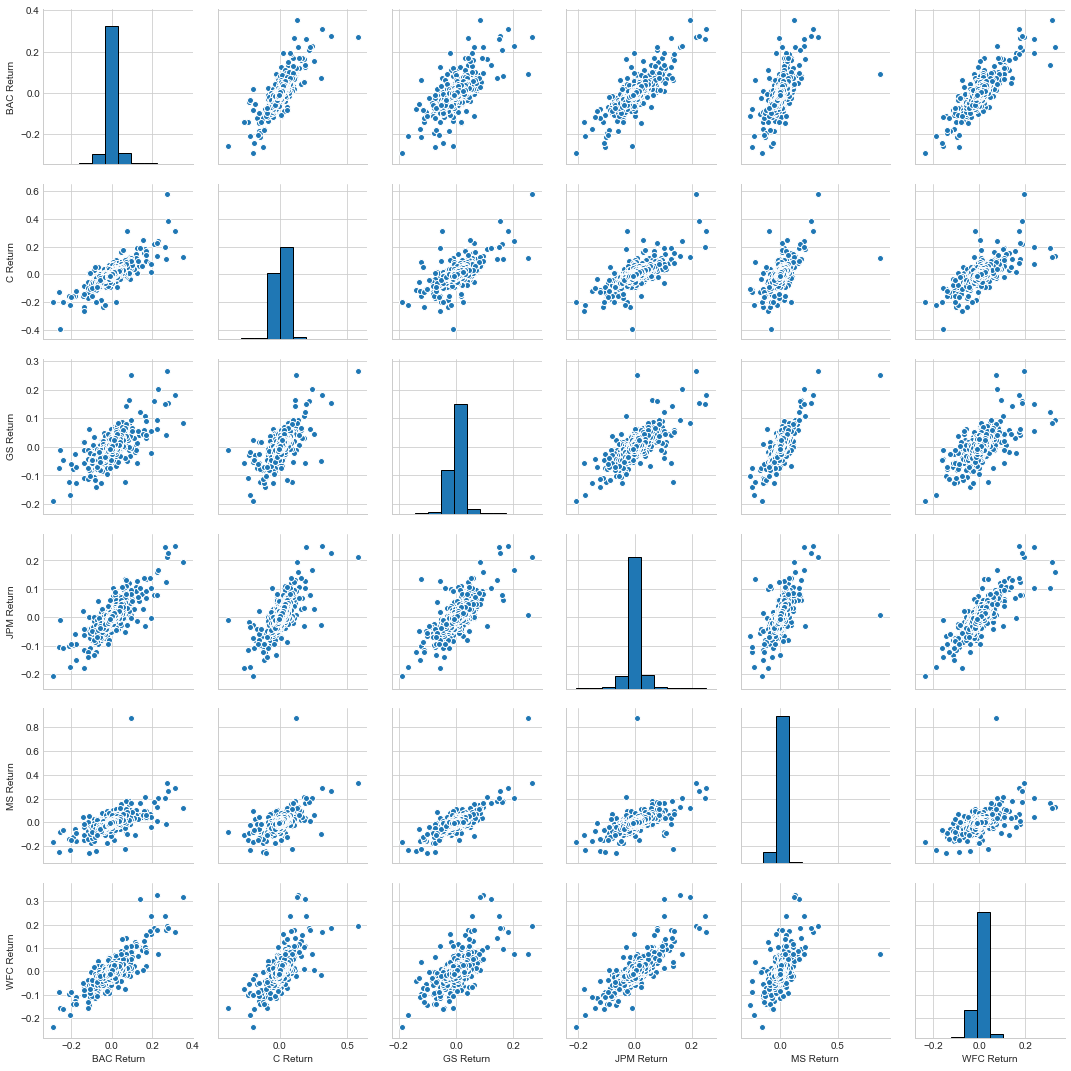

In [283]:
sns.pairplot(returns.iloc[1:,:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [284]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [285]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [286]:
returns.describe().loc['std']

BAC Return    0.034183
C Return      0.035917
GS Return     0.023954
JPM Return    0.025823
MS Return     0.035234
WFC Return    0.028128
Name: std, dtype: float64

The 'C Group Comapny' stocks seems riskiest over entire time

In [287]:
returns.loc['2015-01-01': '2015-12-30',:].std()

BAC Return    0.016175
C Return      0.015306
GS Return     0.014061
JPM Return    0.014034
MS Return     0.016263
WFC Return    0.012602
dtype: float64

The 'Morgan Stanley' stocks seems riskiest over entire time

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



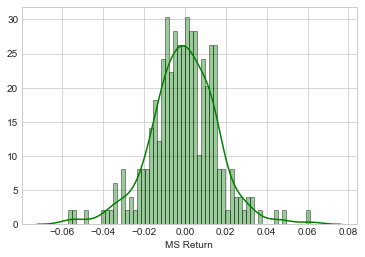

In [288]:

sns.distplot(returns.loc['2015-01-01': '2015-12-30','MS Return'], bins=60, color='green')



** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



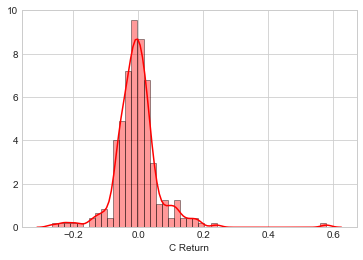

In [290]:

sns.distplot(returns.loc['2008-01-01': '2008-12-30','C Return'], color='red')



____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.



** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

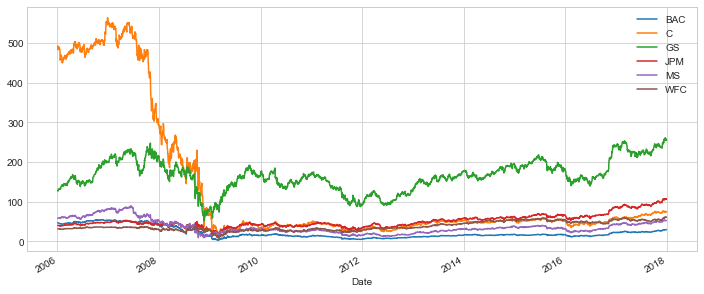

In [297]:
bank_stocks.xs(axis=1,level='Stock Info', key='Close').plot(label=tick,kind='line', figsize=(12,5))
plt.legend()
# for tick in tickers:
#         bank_stocks[tick]['Close'].plot(label=tick,kind='line', figsize=(12,4))
    

    


## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

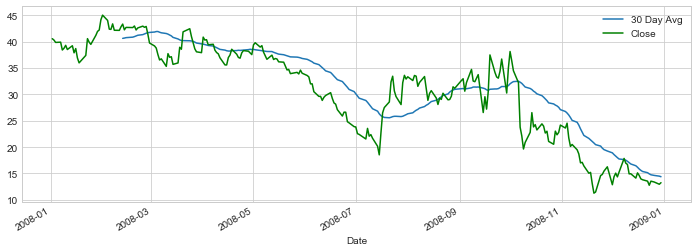

In [330]:
#bank_stocks['BAC'].loc['2008-01-01':'2008-01-30','Close']
bank_stocks['BAC'].loc['2008-01-02':'2008-12-30','Close'].rolling(window=30).mean().plot(label='30 Day Avg', figsize=(12,4))
bank_stocks['BAC'].loc['2008-01-02':'2008-12-30','Close'].plot(label='Close',c='green')
plt.legend()


** Create a heatmap of the correlation between the stocks Close Price.**

In [333]:
stocks_corr = bank_stocks.xs(axis=1, level='Stock Info', key='Close').corr()


Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.954170,0.484182,0.070731,0.938994,-0.004467
C,0.954170,1.000000,0.279648,-0.138398,0.888886,-0.162568
GS,0.484182,0.279648,1.000000,0.754339,0.650642,0.613688
JPM,0.070731,-0.138398,0.754339,1.000000,0.245850,0.881486
MS,0.938994,0.888886,0.650642,0.245850,1.000000,0.155184
WFC,-0.004467,-0.162568,0.613688,0.881486,0.155184,1.000000


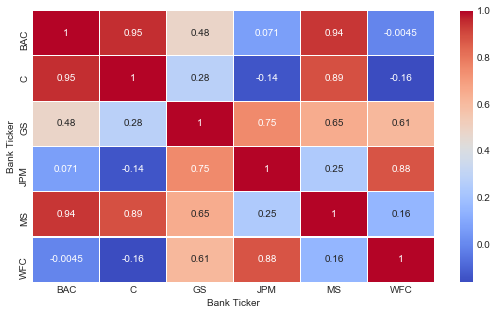

In [344]:
plt.figure(figsize=(9,5))
sns.heatmap(stocks_corr, cmap='coolwarm', lw=0.1, annot=True)


** Optional: Use seaborn's clustermap to cluster the correlations together:**

<Figure size 648x360 with 0 Axes>

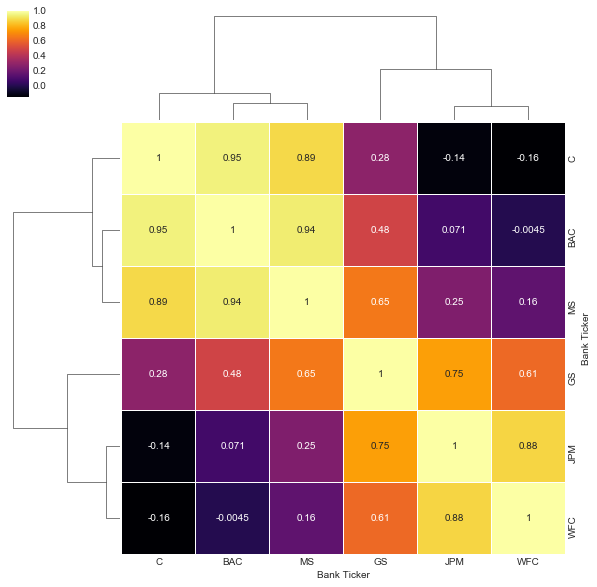

In [348]:
plt.figure(figsize=(9,5))
sns.clustermap(stocks_corr, cmap='inferno', lw=0.1, annot=True)
